# DCBC evaluation

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sys

base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'

This notebook plots the DCBC and cosine error evaluation of the different parcellations

## Evaluation on old parcellations

<AxesSubplot: xlabel='name', ylabel='dcbc'>

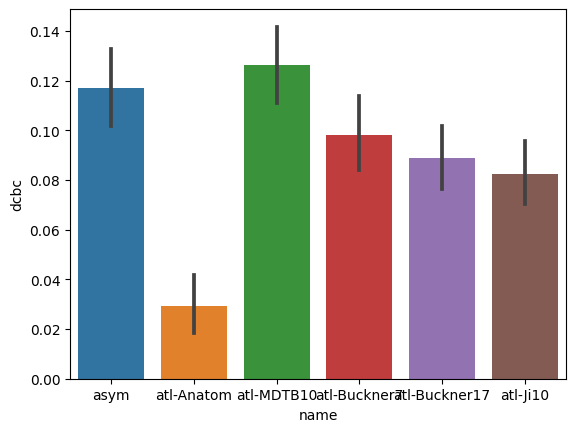

In [9]:
D=pd.read_csv(base_dir + '/Models/eval_dcbc_group.tsv',sep='\t')
D['name']=[s.split('_')[0] for s in D.model_name]
sb.barplot(data=D,x='name',y='dcbc')

In [11]:
D

,model_name,test_data,subj_num,dcbc,name
0,asym_Md_space-MNISymC3_K-10,Mdtb,0,0.101467,asym
1,asym_Md_space-MNISymC3_K-10,Mdtb,1,0.096007,asym
2,asym_Md_space-MNISymC3_K-10,Mdtb,2,0.051763,asym
3,asym_Md_space-MNISymC3_K-10,Mdtb,3,0.205131,asym
4,asym_Md_space-MNISymC3_K-10,Mdtb,4,0.101393,asym
...,...,...,...,...,...
139,atl-Ji10_space-MNI152NLin2009cSymC_dseg,Mdtb,19,0.086433,atl-Ji10
140,atl-Ji10_space-MNI152NLin2009cSymC_dseg,Mdtb,20,0.097446,atl-Ji10
141,atl-Ji10_space-MNI152NLin2009cSymC_dseg,Mdtb,21,0.073917,atl-Ji10
142,atl-Ji10_space-MNI152NLin2009cSymC_dseg,Mdtb,22,0.034162,atl-Ji10


## Evaluation on the new parcellations

In [12]:
# Load evaluation results
type = ['asym']
K = [34]
D = pd.DataFrame()
for t in type:
    for k in K: 
        fname = base_dir + f'/Models/Evaluation_01/eval_dcbc_{t}_K-{k}.tsv'
        dcbc = pd.read_csv(fname, sep='\t')
        dcbc['type']=[t]*dcbc.shape[0]
        D=pd.concat([D,dcbc],ignore_index=True)
D

,model_name,atlas,K,train_data,train_loglik,test_data,indivtrain_ind,indivtrain_val,subj_num,dcbc_group,dcbc_indiv,type
0,7,MNISymC3,34,['Mdtb'],1.157183e+07,Mdtb,half,1,0,0.091766,0.163074,asym
1,7,MNISymC3,34,['Mdtb'],1.157183e+07,Mdtb,half,1,1,0.105380,0.217790,asym
2,7,MNISymC3,34,['Mdtb'],1.157183e+07,Mdtb,half,1,2,0.040569,0.096154,asym
3,7,MNISymC3,34,['Mdtb'],1.157183e+07,Mdtb,half,1,3,0.219142,0.368581,asym
4,7,MNISymC3,34,['Mdtb'],1.157183e+07,Mdtb,half,1,4,0.158348,0.187007,asym
...,...,...,...,...,...,...,...,...,...,...,...,...
695,6,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.483814e+08,Ibc,half,2,7,0.021919,0.078985,asym
696,6,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.483814e+08,Ibc,half,2,8,0.026541,0.031448,asym
697,6,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.483814e+08,Ibc,half,2,9,0.036939,0.071233,asym
698,6,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.483814e+08,Ibc,half,2,10,0.028013,0.057569,asym


### DCBC for group arrangement model: Train and test
Error bars indicate variation in DCBC across subjects (across all four models)

<AxesSubplot: xlabel='test_data', ylabel='dcbc_group'>

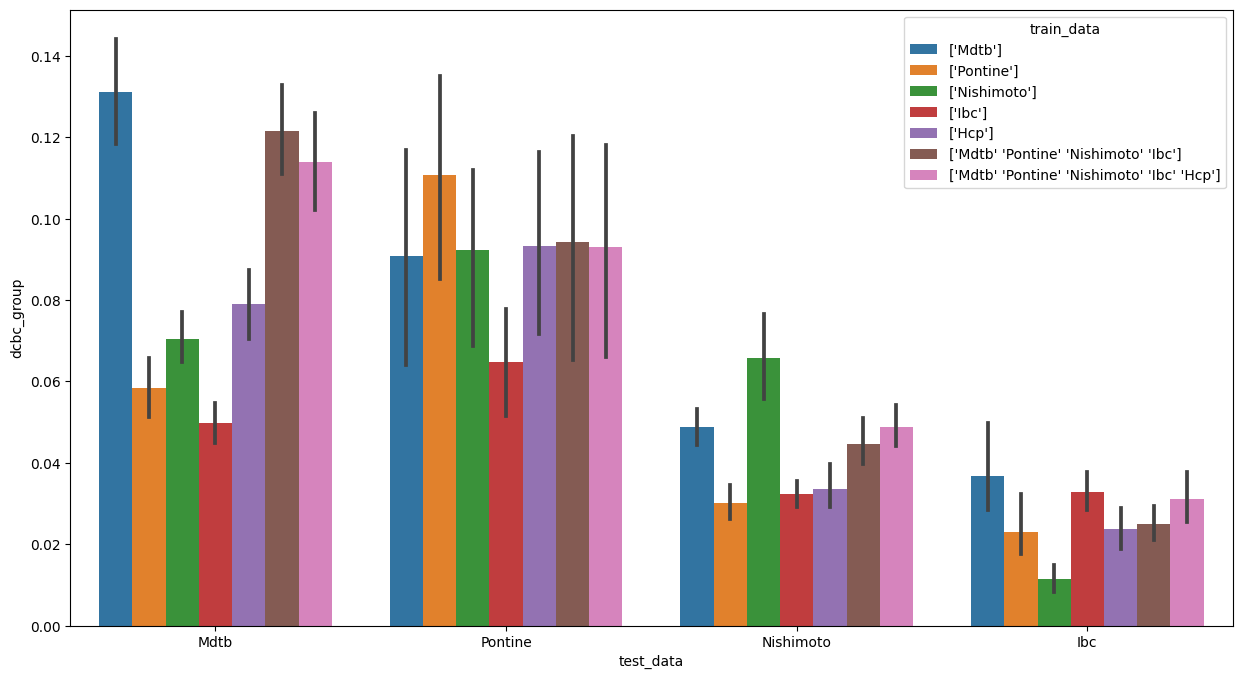

In [13]:
plt.figure(figsize=(15,8))

sb.barplot(data=D.query('K == 34'), x="test_data", y="dcbc_group", hue="train_data")
# sb.barplot(data=dcbc, x="train_data", y="dcbc", hue="test_data")


### Group DCBC as a function of K

<AxesSubplot:xlabel='K', ylabel='dcbc_group'>

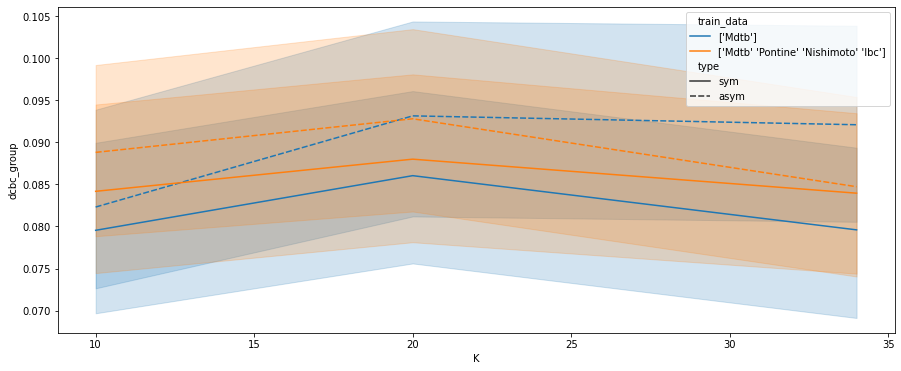

In [17]:
plt.figure(figsize=(15,6))
T= D[(D.train_data=="['Mdtb']") | \
     (D.train_data=="['Mdtb' 'Pontine' 'Nishimoto' 'Ibc']")]
sb.lineplot(data=T,x='K',hue='train_data',style='type',y='dcbc_group')

### DCBC for individual parcellations

<AxesSubplot: xlabel='test_data', ylabel='dcbc_indiv'>

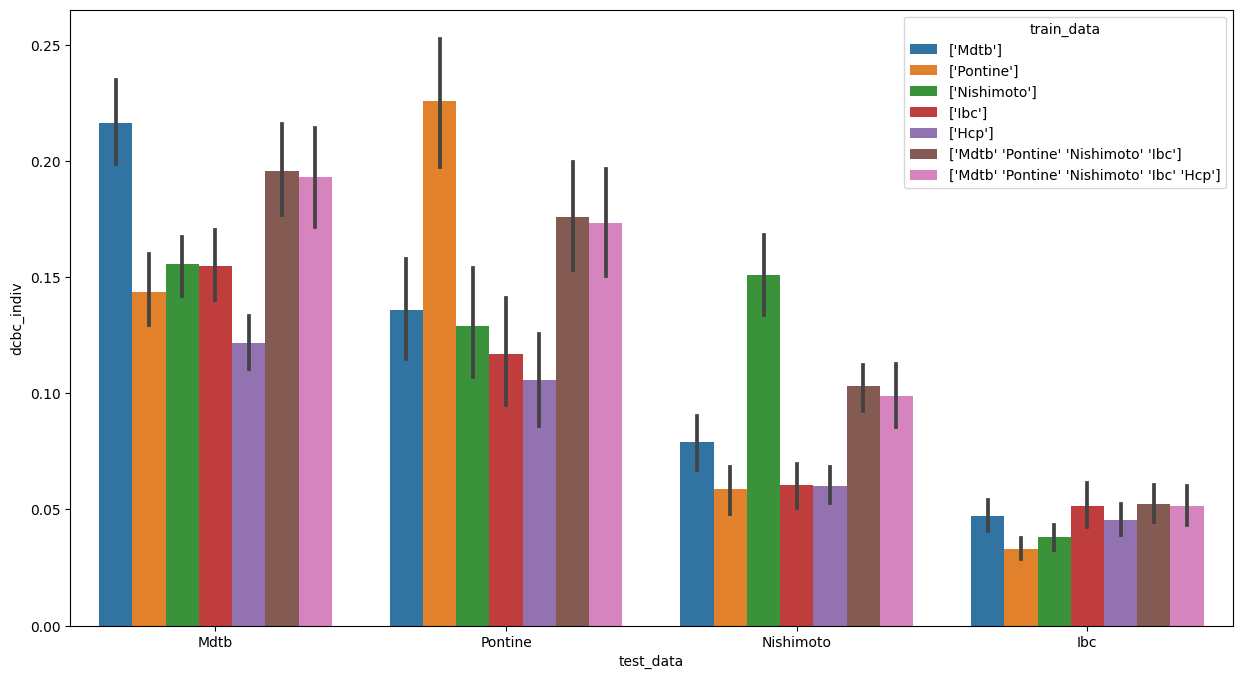

In [5]:
plt.figure(figsize=(15,8))

sb.barplot(data=D, x="test_data", y="dcbc_indiv", hue="train_data")
# sb.barplot(data=dcbc, x="train_data", y="dcbc", hue="test_data")

